# <center>Сравнение методов классификации</center>
Винник Екатерина Петровна, 22.М04
## Задача

- [+] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [+] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блакнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [+] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [+] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [+] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [+] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [+] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [+] (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [+] (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Классификация людей по наличию сердечных заболеваний 

## Чтение данных

In [2]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Возьмём данные заболеваний сердца у пациентов, которые можно скачать [тут](https://www.kaggle.com/code/ahmedadell30/heart-disease-prediction-with-ann-models/data).

Описание датасета: <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак **target** имеет ли пациент заболевание сердца.

## EDA

In [3]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

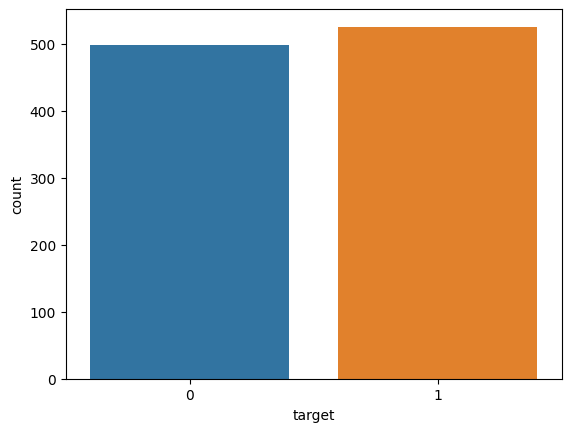

In [4]:
sns.countplot(x="target", data=df)
plt.show()

Количества людей без заболевания сердца и с заболеванием сердца не слишком различаются, но людей с заболеванием сердца немного больше.

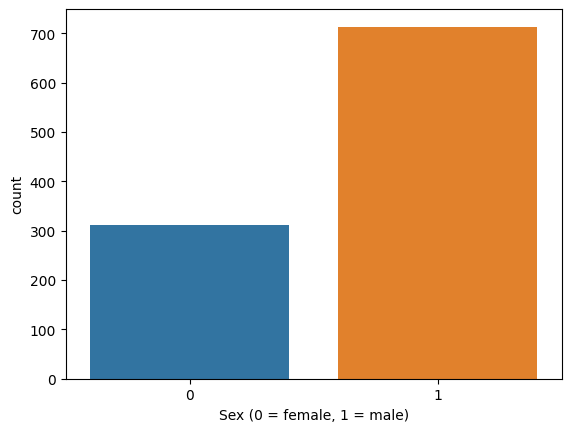

In [5]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

Из графика видно, что в рассматриваемых данных более чем в два раза больше мужчин, чем женщин. 

Рассмотрим категориальный признак cp -- типы боли в груди.

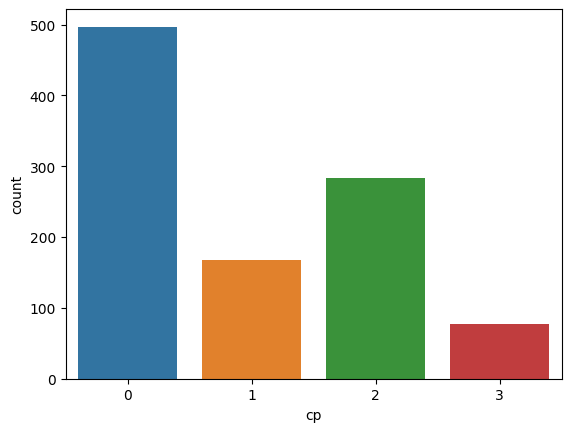

In [6]:
sns.countplot(x="cp", data=df)
plt.show()

Из графика следует, что есть 4 типа боли в груди. Наиболее распространенный тип -- тип 0, наименее распространенный -- тип 0.

Рассмотрим признак exang, характеризующий наличие у человека стенокардии.

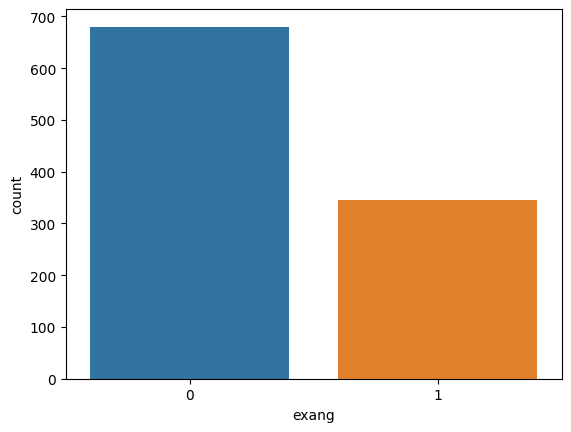

In [7]:
sns.countplot(x="exang", data=df)
plt.show()

Из графика видно, что в датасете преобладает количество людей без стенокардии -- их почти в два раза больше.

Рассмотрим категориальный признак Slope -- значение наклона пикового сегмента ST при нагрузке.

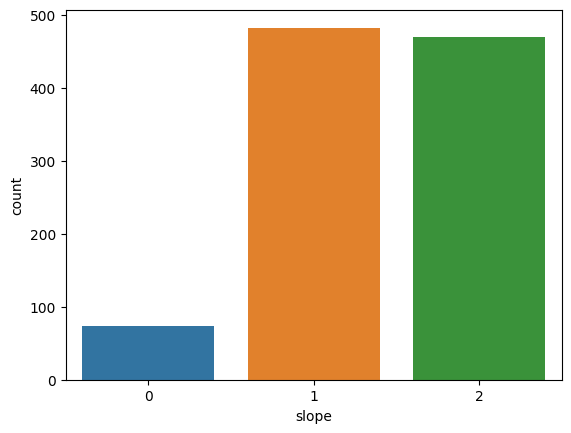

In [8]:
sns.countplot(x="slope", data=df)
plt.show()

Видим, что в датасете совсем немного людей со значением наклона пикового сегмента 0, и примерно одинаковое количество людей со значением наклона пикового сегмента 1 и 2.

Рассмотрим категориальный признак ca, характеризующий количество крупных сосудов у человека.

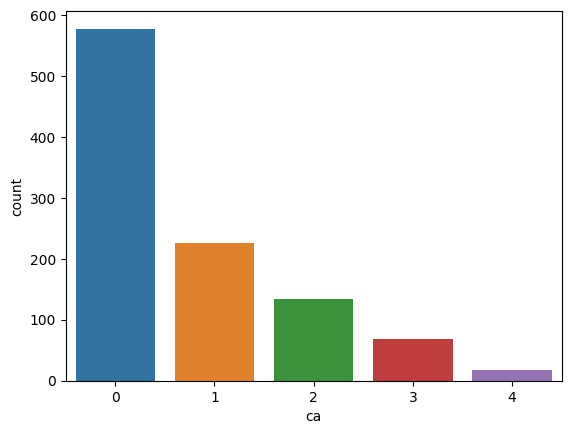

In [9]:
sns.countplot(x="ca", data=df)
plt.show()

Преобладает количество людей, не имеющих крупных сосудов (количество крупных сосудов 0). Количество человек, имеющих определенное количество крупных сосудов, обратно пропорционально количеству сосудов (чем больше крупных сосудов у человека, тем менее вероятно встретить его в датасете).

### Двумерный анализ признаков

#### Age vs Target

Построим график зависимости частоты заболеваний сердца от возраста.

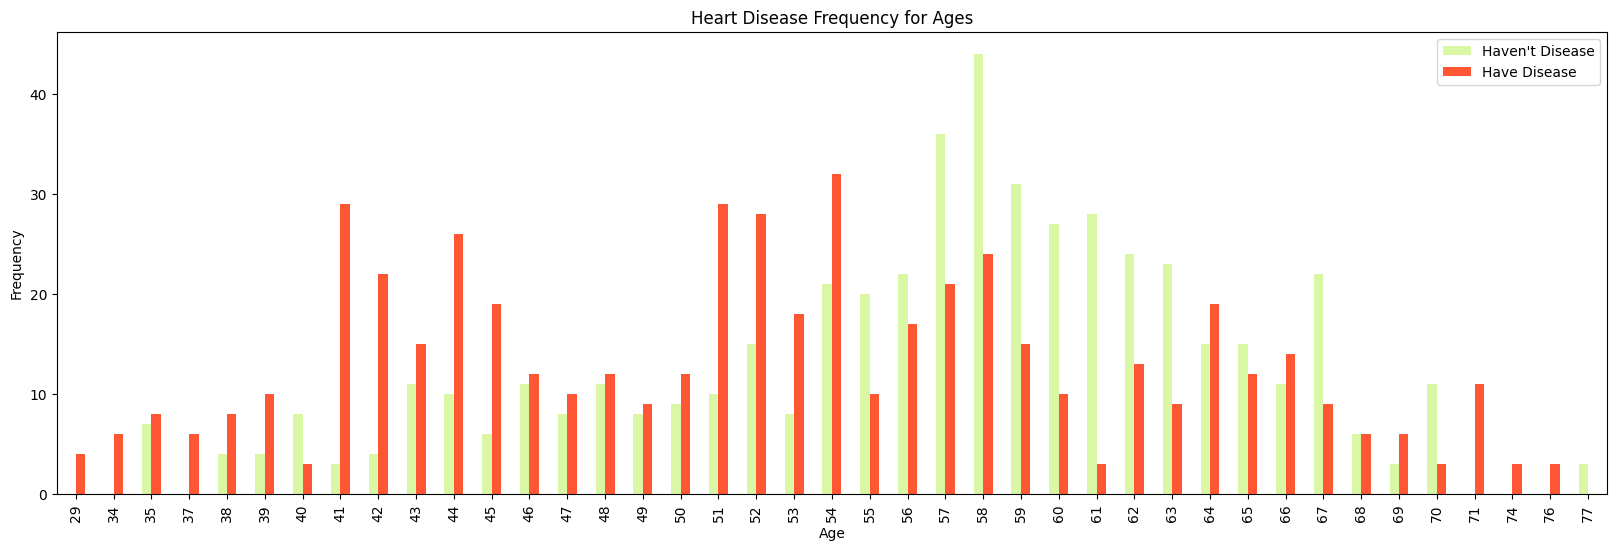

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

Из графика видно, что среди людей моложе 55 лет преобладают люди с сердечными заболеванияями (кроме людей, имеющих возраст 40 лет), тогда как среди людей старше 55 лет преобладают люди без сердечных заболеваний. 

#### Sex vs Target
Проанализируем зависимость наличия болезней сердца от пола.

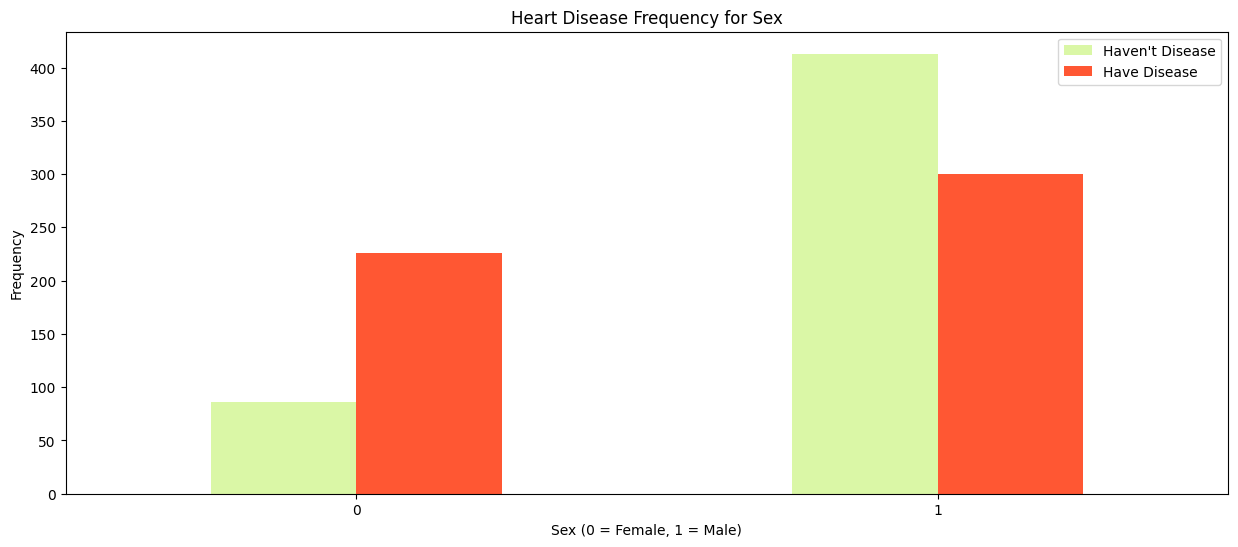

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Заболевания сердца чаще есть у мужчин, чем у женщин. Однако, хотя количество женщин с заболеванием сердца 
меньше количества мужчин с заболеванием сердца, среди женщин преобладают женщины с сердечными заболеваниями. Среди мужчин наоборот больше мужчин без болезней сердца.

#### Slope vs Target

Построим график наличия сердечных заболеваний относительно типа пикового сегмента ST:

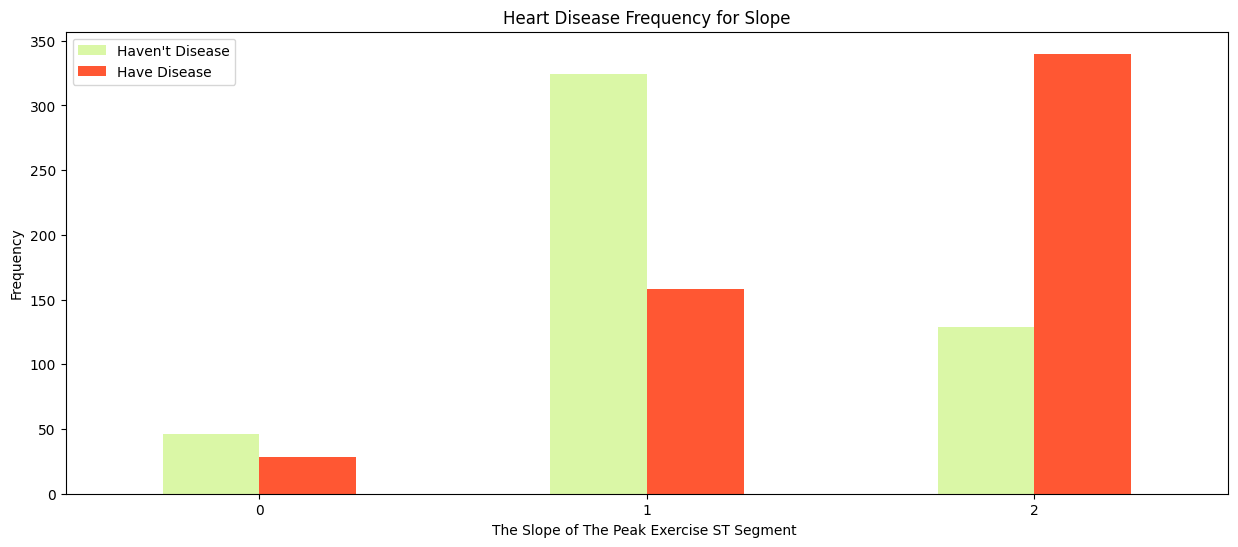

In [12]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

Видим, что у людей с типом пикового сегмента ST 0 и 1 преобладает число людей без сердечных заболеваний. 
У людей с типом пикового сегмента ST 2 преобладает число пациентов, обладающих сердечными заболеваниями.

#### FBS vs Target
Посмотрим, влияет ли уровень сахара в крови на наличие сердечных заболеваний.

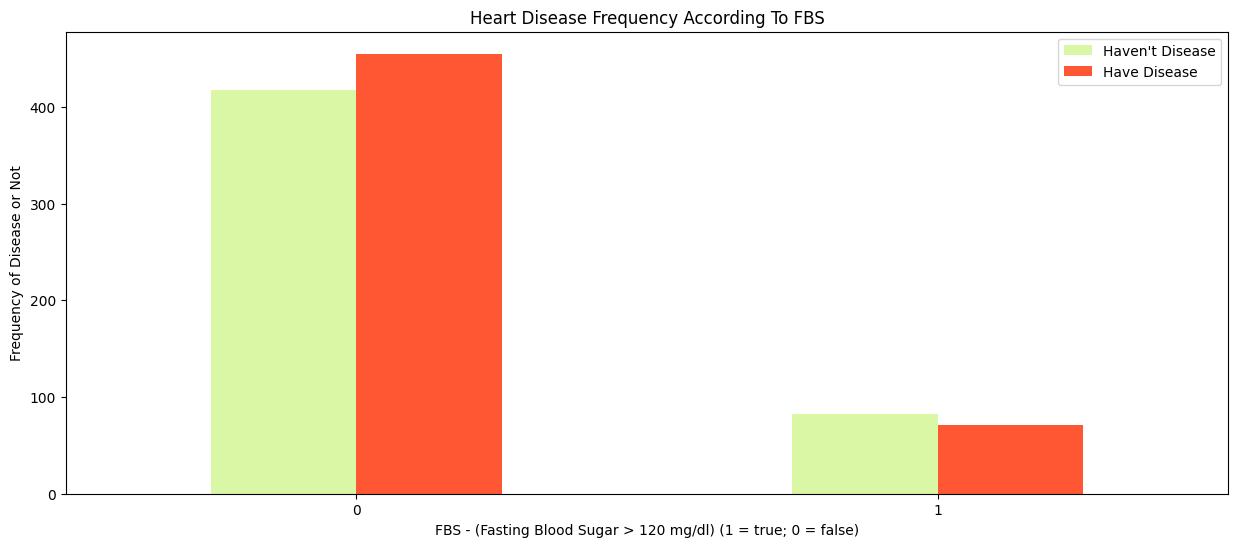

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Кажется, что уровень сахара в крови не слишком сильно влияет на наличие сердечных заболеваний -- количество людей с сердечными заболеваниями и без примерно одинаковое в обоих случаях (и при уровне сахара, не превосходящем 120 mg/dl и при уровне сахара выше 120 mg/dl).

#### CP vs Target
Построим график наличия сердечных заболеваний относительно типа боли в груди:

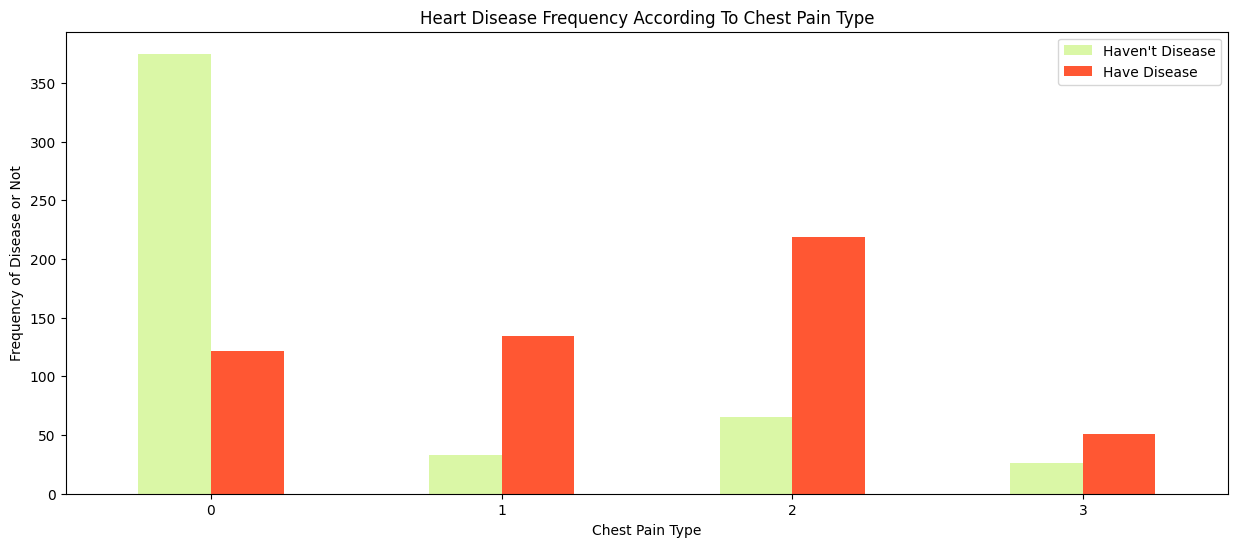

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Видим, что большинство людей с типами боли 1, 2, 3 в груди имеют сердечные заболевания. Особенно преобладают люди с сердечными заболеваниями в категории людей, имеющих тип боли в груди 2. Количество людей без сердечных заболеваний с типом боли в груди 0 приблизительно в три раза больше, чем количество людей с типом боли в груди 0, имеющих сердечные заболевания.

#### ca vs Target

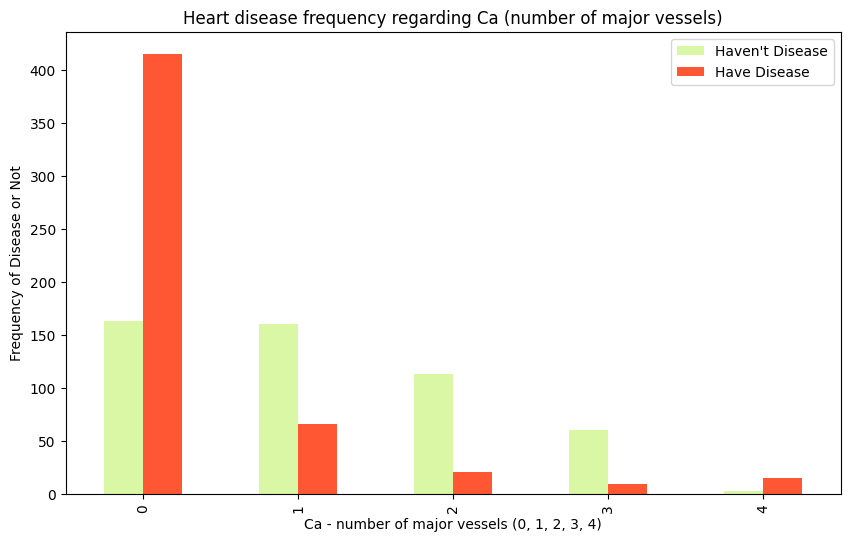

In [15]:
pd.crosstab(df.ca, df.target).plot(kind="bar", figsize=(10, 6), color=['#DAF7A6','#FF5733'])
plt.title('Heart disease frequency regarding Ca (number of major vessels)')
plt.xlabel('Ca - number of major vessels (0, 1, 2, 3, 4)')
plt.ylabel('Frequency of Disease or Not')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

Из графика видно, что среди людей с количеством крупных сосудов от 0 до 4, больше всего людей имеют сердечные заболевания при отсутствии крупных сосудов. Но так как большинство людей датасета не имеют крупных сосудов (анализировали ранее), нельзя утверждать, что отсутствие крупных сосудов влияет на наличие сердечных заболеваний. 
Среди людей с количеством крупных сосудов от 1 до 3 преобладают люди без сердечных заболеваний. Среди людей с четырьмя крупными сосудами преобладают люди с сердечными заболеваниями.

### Преобразование категориальных признаков

Закодируем категориальные признаки **cp**, **thal** и **slope**.

In [16]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [17]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


## Разбиение данных с использованием train_test_split и масштабирование

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std


accuracies = {}
models = {}

# common methods
def get_best_accuracy_from_estimators(dictionary, X, y):
    estimators = dictionary['estimator']
    max_accuracy = 0.
    for estimator in estimators:
        y_pred = estimator.predict(X)
        accuracy = accuracy_score(y, y_pred)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
    return max_accuracy

def classification_using_cross_val(model):    
    # repeated k fold validation with tuned hyperparameters
    lr_accuracies = []
    max_accuracy = 0.
    number_of_folds = 0
    ks = range(3,13)
    for i in ks:
        cv = RepeatedKFold(n_splits=i, n_repeats=3, random_state=1)
        dictionary = cross_validate(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1, return_estimator=True)
        accuracy = get_best_accuracy_from_estimators(dictionary, X_test_scaled, y_test)
        if (accuracy > max_accuracy):
            max_accuracy = accuracy
            number_of_folds = i
        lr_accuracies.append(accuracy)  
    return (max_accuracy, number_of_folds)

def simple_classification(lr):
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    acc = accuracy_score(y_pred, y_test)
    print("Test Accuracy without repeated k-Fold Cross-Validation {:.4f}".format(acc))

In [21]:
def logistic_regression_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet","none"]}
    searcher=GridSearchCV(LogisticRegression(random_state=42), grid, scoring='accuracy', cv=5)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_C = searcher.best_params_["C"]
    best_penalty = searcher.best_params_["penalty"]
    print("Best C = ", best_C)
    print("Best penalty = ", best_penalty)
    model = LogisticRegression(C=best_C, penalty=best_penalty)
    #calculating accuracy
    return classification_using_cross_val(model), model
   
model = LogisticRegression()    
simple_classification(model)
(accuracy, number_of_folds) = classification_using_cross_val(model)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = logistic_regression_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
accuracies['Logistic Regression'] = accuracy
models['Logistic Regression'] = best_model


Test Accuracy without repeated k-Fold Cross-Validation 0.8084
Test accuracy achieved with repeated 6 -Fold Cross-Validation: 0.828
Best C =  0.001
Best penalty =  none
Test accuracy achieved with repeated 6 -Fold Cross-Validation && tuned hyperparams: 0.828


Кросс-валидация улучшила точность классификатора. 
Количество фолдов варьировалось с 3 до 13, на 6 фолдах достигается максимальная точность. 
Увеличение количества повторов кросс-валидации не дало улучшения (проверялось вручную). 
Тюнинг параметров C и penalty не произвел дополнительных улучшений. 

## Logistic regression implemented

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator

class MyLogisticRegression(BaseEstimator):
    def __init__(self, learning_rate=0.1, max_iter=1000, regularization='l2', C = 1, tolerance = 0.0001, _estimator_type='classifier'):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
        self._estimator_type = _estimator_type
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1] + 1)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        for _ in range(self.max_iter):  
            errors = (self.__sigmoid(X @ self.theta)) - y
            N = X.shape[1]

            if self.regularization is not None:
                delta_grad = self.learning_rate * ((self.C * (X.T @ errors)) + np.sum(self.theta))
            else:
                delta_grad = self.learning_rate * (X.T @ errors)

            if np.all(abs(delta_grad) >= self.tolerance):
                self.theta = self.theta - delta_grad / N
            else:
                break               
        return self
    def predict_proba(self, X):
        return self.__sigmoid((X @ self.theta[1:]) + self.theta[0])    
    
    def predict(self, X):
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def set_params(self, learning_rate=0.1, max_iter=1000, regularization='l2', C = 1, tolerance = 0.0001, _estimator_type='classifier'):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
        self._estimator_type = _estimator_type
        return self

    def get_params(self, deep=False):
            params = dict()
            params['learning_rate'] = self.learning_rate
            params['C'] = self.C
            params['max_iter'] = self.max_iter
            params['regularization'] = self.regularization
            params['tolerance'] = self.tolerance
            params['_estimator_type'] = self._estimator_type
            return params

In [23]:
def my_logistic_regression_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    grid={"C":np.logspace(-3,3,7), "regularization":["l2", None]}
    searcher=GridSearchCV(MyLogisticRegression(), grid, scoring='accuracy', cv=5, error_score='raise')
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_C = searcher.best_params_["C"]
    best_penalty = searcher.best_params_["regularization"]
    print("Best C = ", best_C)
    print("Best regularization = ", best_penalty)
    model = MyLogisticRegression(C=best_C, regularization=best_penalty)
    # calculating accuracy
    return classification_using_cross_val(model), model

m = MyLogisticRegression()
simple_classification(m)
(accuracy, number_of_folds) = classification_using_cross_val(MyLogisticRegression())
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = my_logistic_regression_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
accuracies['My Logistic Regression'] = accuracy
models['My Logistic Regression'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.8084
Test accuracy achieved with repeated 7 -Fold Cross-Validation: 0.831
Best C =  0.001
Best regularization =  None
Test accuracy achieved with repeated 6 -Fold Cross-Validation && tuned hyperparams: 0.838


Реализованная логистическая регрессия показала результаты лучше библиотечной, возможно потому, что позволяет регулировать learning_rate, который для библиотечной логистической регрессии регулировать нельзя.

## K-Nearest Neighbour (KNN) Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier

def knn_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    n_neighbors = range(1, 21, 2)
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']
    # define grid search
    grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
    searcher=GridSearchCV(KNeighborsClassifier(), grid, scoring='accuracy', cv=5)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_neighbors = searcher.best_params_['n_neighbors']
    best_weights = searcher.best_params_['weights']
    best_metric = searcher.best_params_['metric']
    print("Best n neighbors = ", best_neighbors)
    print("Best penalty = ", best_weights)
    print("Best metric = ", best_metric)
    model = KNeighborsClassifier(n_neighbors=best_neighbors, weights=best_weights, metric=best_metric)
    # calculating accuracy
    return classification_using_cross_val(model), model

knn = KNeighborsClassifier()
simple_classification(knn)
(accuracy, number_of_folds) = classification_using_cross_val(knn)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = knn_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['KNN'] = accuracy
models['KNN'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.8442
Test accuracy achieved with repeated 5 -Fold Cross-Validation: 0.873
Best n neighbors =  7
Best penalty =  distance
Best metric =  manhattan
Test accuracy achieved with repeated 3 -Fold Cross-Validation && tuned hyperparams: 0.990


Кросс-валидация улучшила метрики модели. Тюнинг гиперпараметров с последующей кросс-валидацией позволило получить еще более точную модель.

## K-Nearest Neighbour (KNN) Classification implemented

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class MyKNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy
    
    def set_params(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        return self
        
    def get_params(self, deep=False):
        params = dict()
        params['k'] = self.k
        params['dist_metric'] = self.dist_metric
        return params
    

In [26]:
def my_knn_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    k = range(1, 21, 2)
    # define grid search
    grid = dict(k=k)
    searcher=GridSearchCV(MyKNeighborsClassifier(), grid, scoring='accuracy', cv=5)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_neighbors = searcher.best_params_['k']
    print("Best n neighbors = ", best_neighbors)
    model = MyKNeighborsClassifier(k=best_neighbors)
    # calculating accuracy
    return classification_using_cross_val(model), model

myknn = MyKNeighborsClassifier()
simple_classification(myknn)
(accuracy, number_of_folds) = classification_using_cross_val(myknn)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = my_knn_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['MYKNN'] = accuracy
models['MYKNN'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.8442
Test accuracy achieved with repeated 5 -Fold Cross-Validation: 0.873
Best n neighbors =  1
Test accuracy achieved with repeated 11 -Fold Cross-Validation && tuned hyperparams: 0.974


Реализованный knn в случаях простой модели и модели с кросс-валидацией дал те же результаты, что и библиотечный. Knn с тюнингом гиперпараметров и кросс-валидацией позволил получить модель, менее точную, чем библиотечная, полученная этими же средствами. Скорее всего вызвано тем, что реализация позволяла тюнинговать меньший набор параметров (был произведен тюнинг только параметра количества соседей).

## Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC

def svm_using_cross_val_and_tuning_hp():
    # define model and parameters
    model = SVC()
    kernel = ['poly', 'rbf', 'sigmoid']
    C = [50, 10, 1.0, 0.1, 0.01]
    gamma = ['scale']
    # define grid search
    grid = dict(kernel=kernel,C=C,gamma=gamma)
    searcher=GridSearchCV(SVC(random_state=12), grid, scoring='accuracy', cv=5)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    return classification_using_cross_val(searcher), searcher

svm = SVC(random_state = 12)
simple_classification(svm)
(accuracy, number_of_folds) = classification_using_cross_val(svm)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) =svm_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['SVM'] = accuracy
models['SVM'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.8961
Test accuracy achieved with repeated 9 -Fold Cross-Validation: 0.906
Test accuracy achieved with repeated 9 -Fold Cross-Validation && tuned hyperparams: 0.994


Кросс-валидация и тюнинг гиперпараметров позволили улучшить качество модели.

## Naive Bayes Algorithm

In [28]:
from sklearn.naive_bayes import GaussianNB

def nb_using_cross_val_and_tuning_hp():
    grid = {
    'var_smoothing': np.logspace(0,-9, num=30)
    }
    searcher=GridSearchCV(GaussianNB(), grid, scoring='accuracy', cv=5)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    return classification_using_cross_val(searcher), searcher
    
nb = GaussianNB()
simple_classification(nb)
(accuracy, number_of_folds) = classification_using_cross_val(nb)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = nb_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['NB'] = accuracy
models['NB'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.6688
Test accuracy achieved with repeated 6 -Fold Cross-Validation: 0.708
Test accuracy achieved with repeated 6 -Fold Cross-Validation && tuned hyperparams: 0.834


Кросс-валидация и тюнинг гиперпараметров позволили улучшить качество модели. Однако точность модели даже в этом случае осталась достаточно низкой -- ниже точности модели с использованием реализованного алгоритма логистической регрессии, ниже SVM и knn.

## Decision Tree Algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier

def dtc_using_cross_val_and_tuning_hp():
    grid = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ["gini", "entropy"]
    }
    searcher=GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    return classification_using_cross_val(searcher), searcher

dtc = DecisionTreeClassifier()
simple_classification(dtc)
(accuracy, number_of_folds) = classification_using_cross_val(dtc)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = dtc_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['DTC'] = accuracy
models['DTC'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.9805
Test accuracy achieved with repeated 8 -Fold Cross-Validation: 0.990
Test accuracy achieved with repeated 9 -Fold Cross-Validation && tuned hyperparams: 0.994


Кросс-валидация и тюнинг гиперпараметров позволили улучшить качество модели и достигнуть примерной точности модели с использованием алгоритма SVM.

## Comparing Models

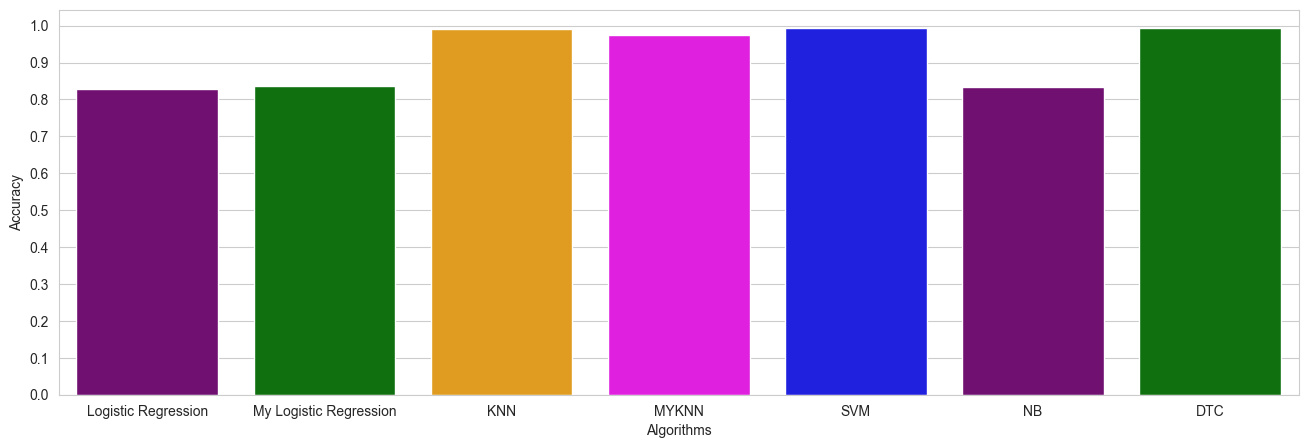

In [30]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [31]:
# Predicted values
lr = models['Logistic Regression']
lr.fit(X_train_scaled, y_train)
y_head_lr = lr.predict(X_test_scaled)

my_lr = models['My Logistic Regression']
my_lr.fit(X_train_scaled, y_train)
y_head_my_lr = my_lr.predict(X_test_scaled)

knn1 = models['KNN']
knn1.fit(X_train_scaled, y_train)
y_head_knn = knn1.predict(X_test_scaled)

my_knn1 = models['MYKNN']
my_knn1.fit(X_train_scaled, y_train)
y_head_my_knn = my_knn1.predict(X_test_scaled)

y_head_svm = models['SVM'].predict(X_test_scaled)

y_head_nb = models['NB'].predict(X_test_scaled)

y_head_dtc = models['DTC'].predict(X_test_scaled)

In [32]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_my_lr = confusion_matrix(y_test, y_head_my_lr)

cm_knn = confusion_matrix(y_test, y_head_knn)
cm_my_knn = confusion_matrix(y_test, y_head_my_knn)

cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

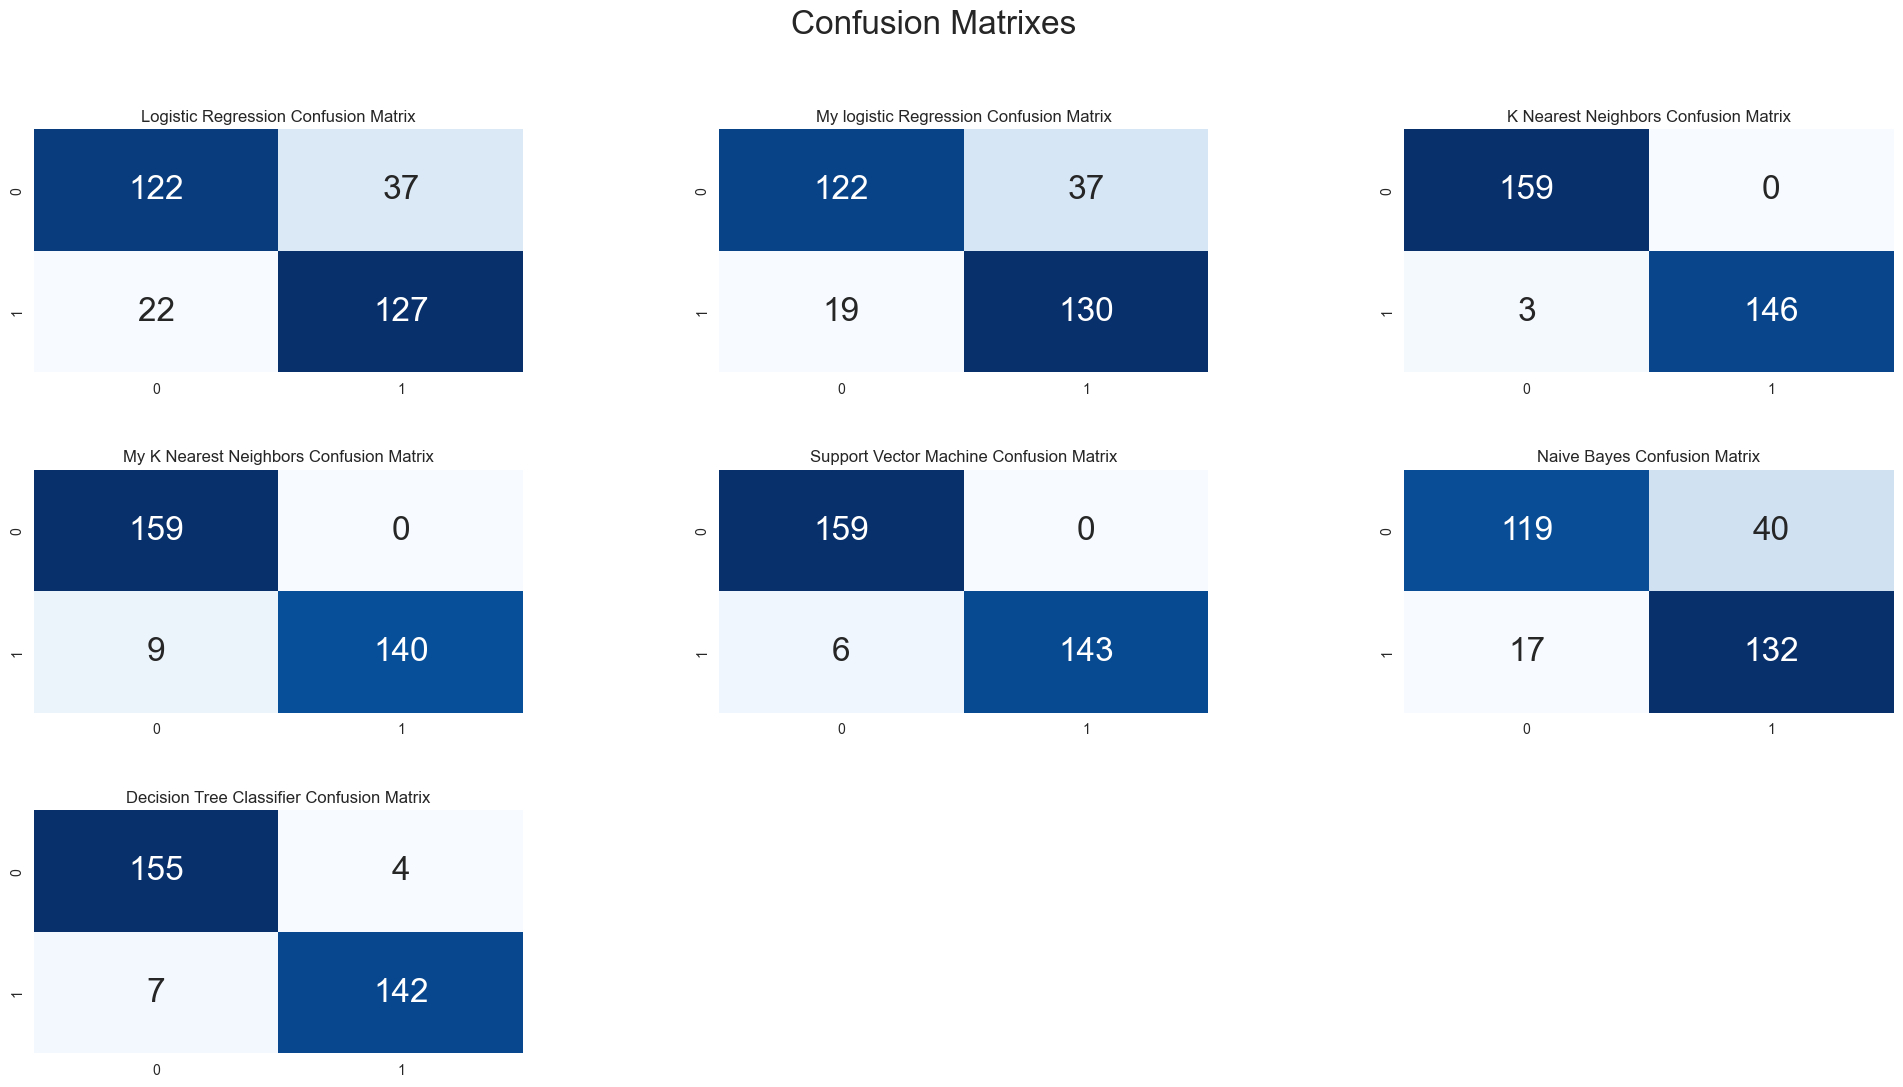

In [33]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("My logistic Regression Confusion Matrix")
sns.heatmap(cm_my_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("My K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_my_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Наилучшую точность показали модели DTC и SVM. При этом для SVM тюнинг гиперпараметров и кросс-валидация позволили существенно повысить точность модели, тогда как у DTC точность модели без каких-либо дополнительных улучшений была достаточно высокой (98.4). Наихудшую точность среди рассмотренных моделей показали библиотечная логистическая регрессия, реализованная логистическая регрессия и naive bayes (меньше 0.85).

## Классификация людей по половому признаку

In [34]:
df = pd.read_csv('./gender_classification.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [35]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [36]:
# Encode the 'gender' variable: 0 for 'Male & 1 for 'Female'
code = {'Male':0, 'Female':1}
df['gender'] = df['gender'].map(code)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


## EDA

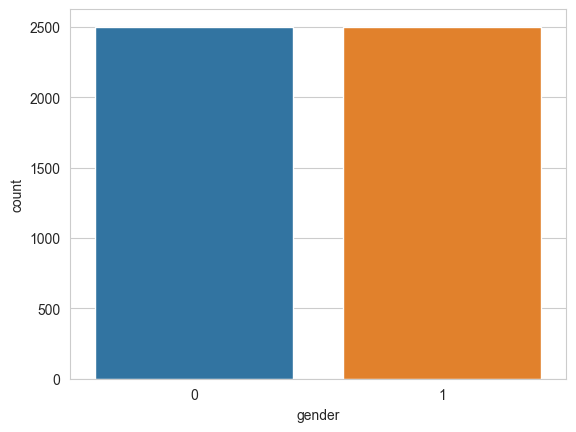

In [37]:
sns.countplot(x="gender", data=df)
plt.show()

In [38]:
df.gender.value_counts()

1    2501
0    2500
Name: gender, dtype: int64

В датасете почти поровну мужчин и женщин.

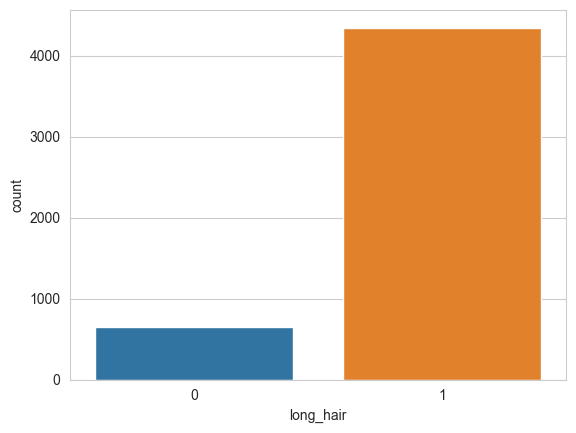

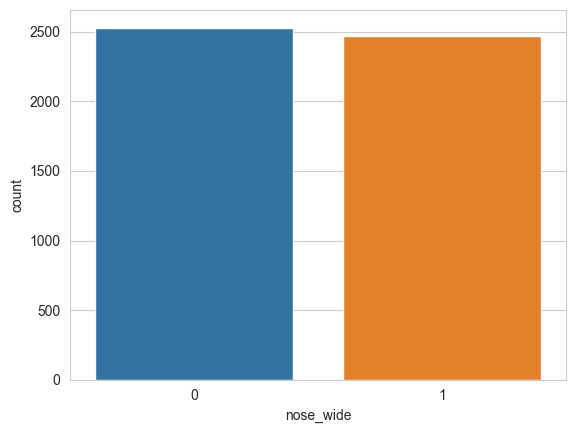

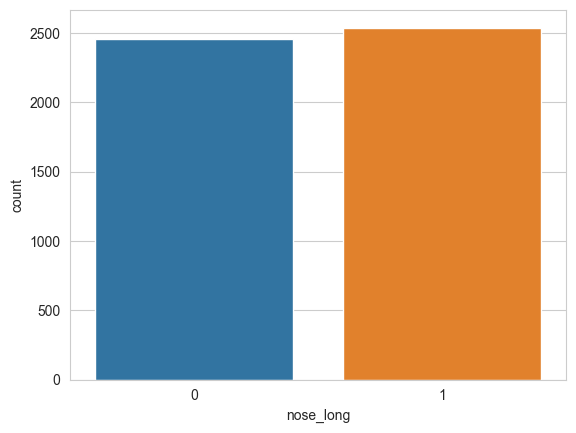

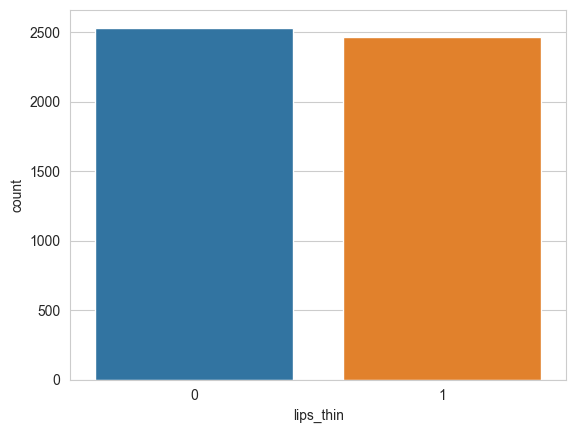

In [40]:
cols = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin']
for col in cols:
    sns.countplot(x=df[col], data=df)
    plt.show()
    print('\n')

У большинства людей в датасете длинные волосы. Людей с тонкими губами примерно такое же количество, как людей с не тонкими губами. Людей с широким носом примерно столько же, сколько людей с тонким носом. Людей с длинным носом примерно столько же, сколько людей с коротким носом.

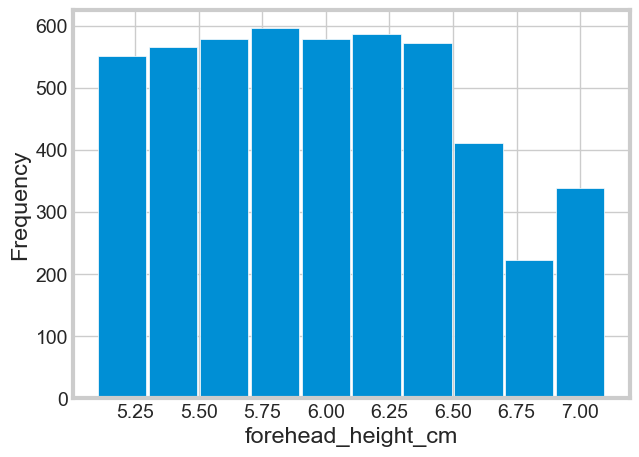

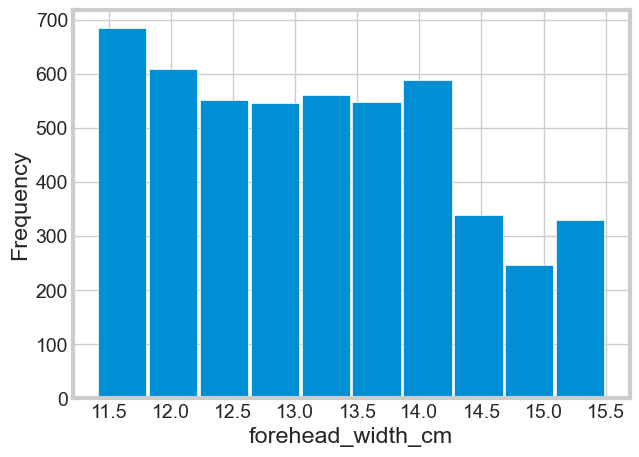

In [55]:
cols2 = ['forehead_height_cm','forehead_width_cm']
for col in cols2:
    df[col].plot(kind='hist', rwidth=0.95)
    plt.xlabel(col)
    plt.show()
    print('\n')

Значения высоты лба до 6.5 см встречаются более чем у 500 человек из датасета для каждого значения (т.е., наиболее часто встречается высота лба до 6.5см). Наиболее частое значение ширины лба 11.5 см -- оно встречается почти у 700 человек, в целом часто встречаются значения ширины лба до 14.5 см (более 500 человек на каждое из значений ширины до 14.5см).

### Двумерный анализ признаков 

Проанализируем параметры лба человека в зависимости от пола.

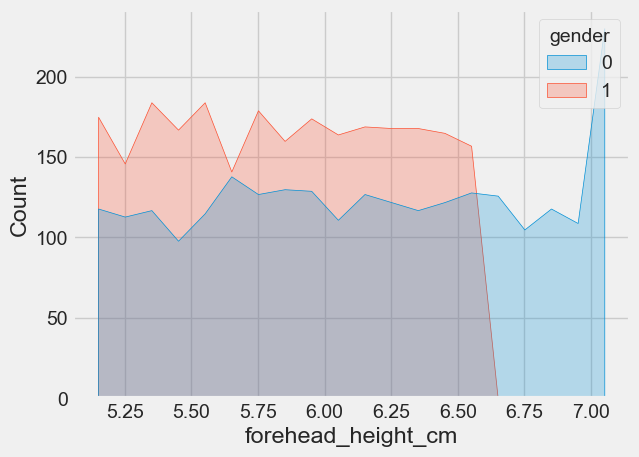

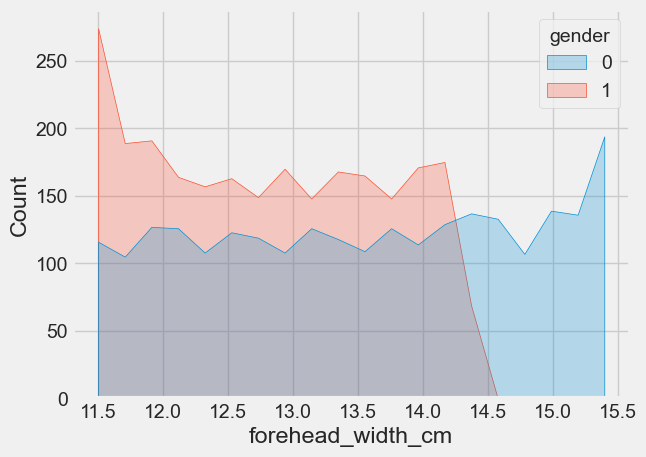

In [42]:
for col in cols2:
    sns.histplot(data=df[[col,'gender']],x=col, hue='gender',element='poly')
    plt.show()

Из графиков видно, что у женщин ширина и высота лба меньше, чем у мужчин -- т.е., значение высоты лба у женщин не превышает 6.75 см, т.к. у мужчин достигает 7см, значение ширины лба у женщин немногим превосходит 14.5см, тогда как у мужчин достигает 15.5 см.

Проанализируем зависимость длины волос, ширины и длины носа от пола.

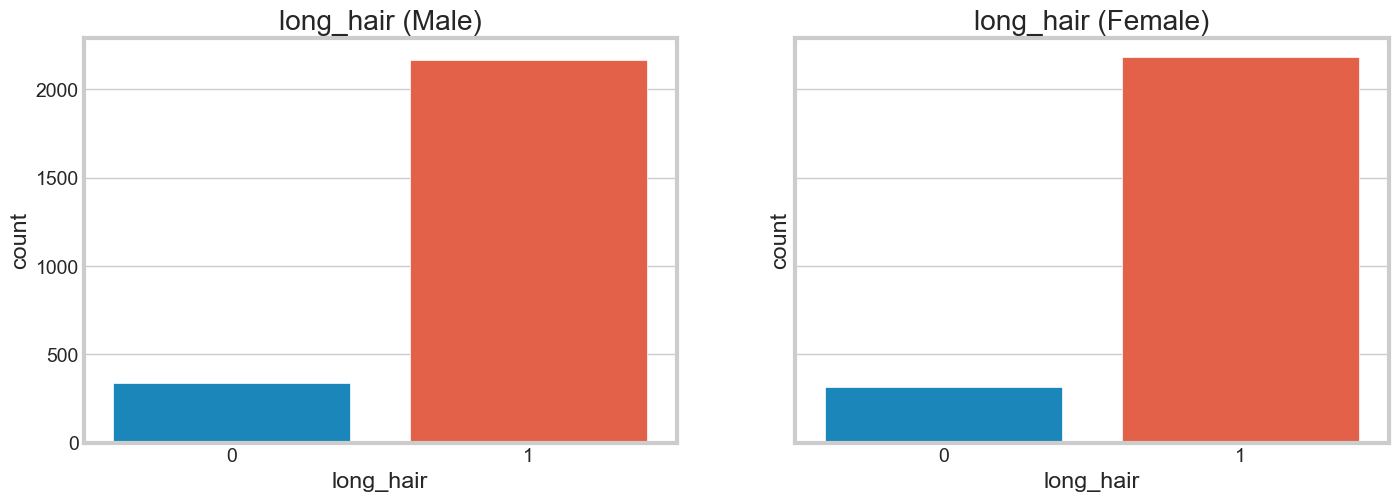

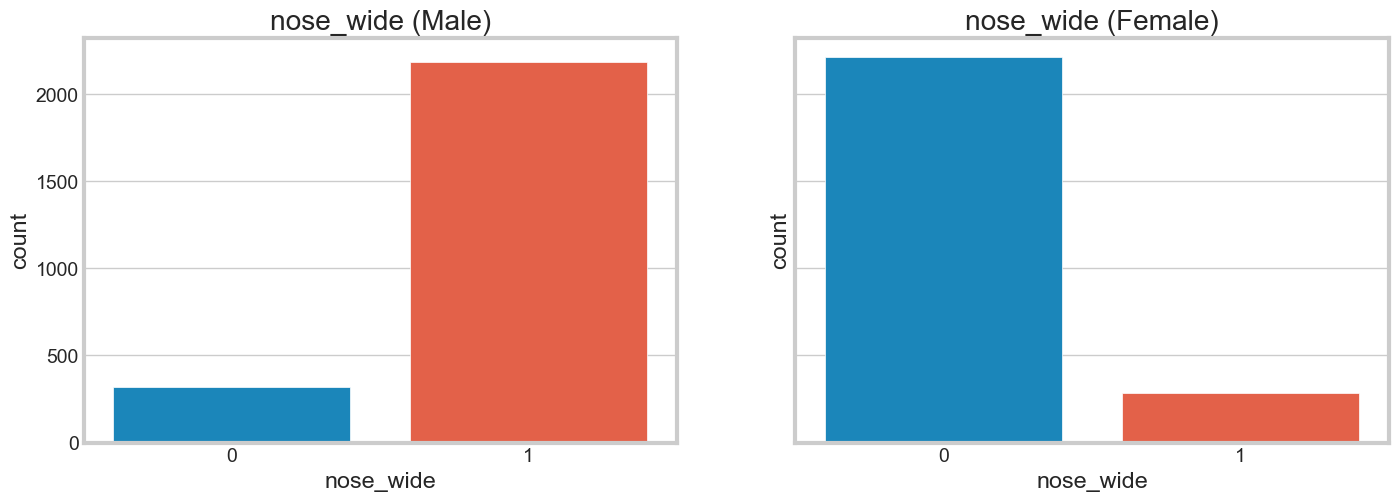

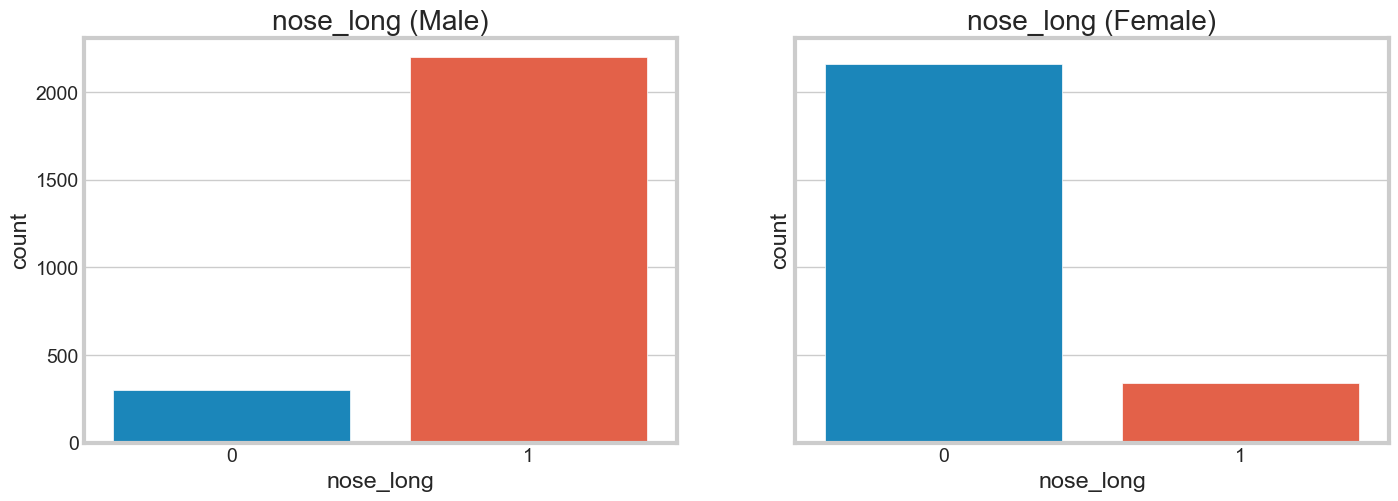

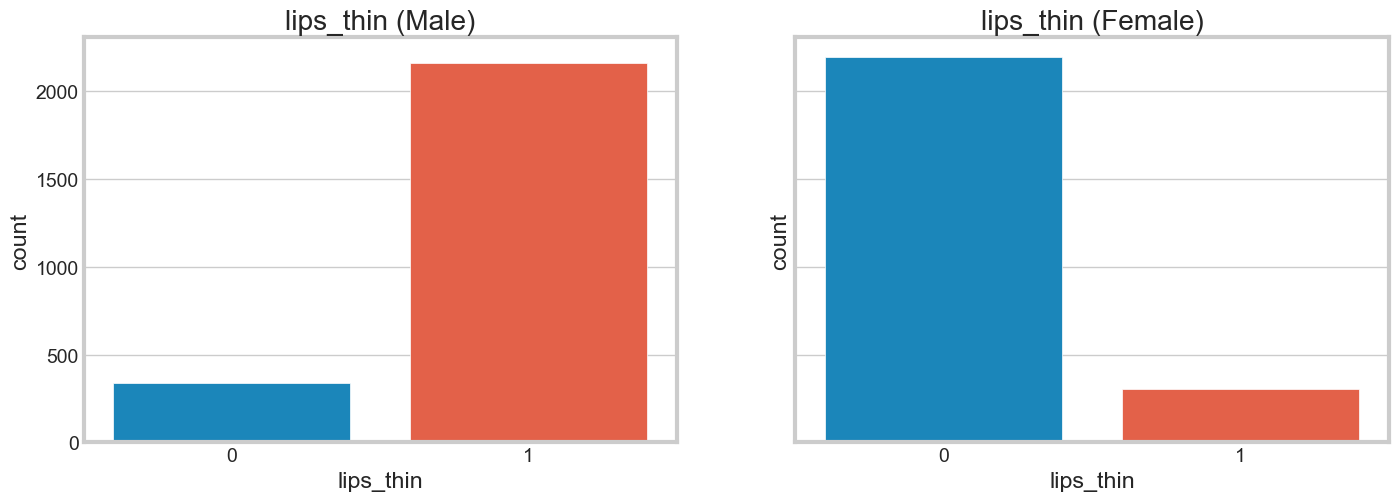

In [61]:
male_data = df[df['gender'] == 0]
female_data = df[df['gender'] == 1]
for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    sns.countplot(ax=axes[0], x=male_data[col])
    axes[0].set_title(f'{col} (Male)')

    sns.countplot(ax=axes[1], x=female_data[col])
    axes[1].set_title(f'{col} (Female)')
    plt.show()

У большинства и мужчин и женщин длинные волосы. У большинства мужчин широкий нос, а у большинства женщин -- узкий. У большинства мужчин длинный нос, у большинства женщин -- короткий. У большинства мужчин не тонкие губы, у большинства женщин -- тонкие.

В качестве результата предварительного анализа данных можно отметить, что достаточно много признаков выглядят кореллирующимися с полом человека.

## Подготовка тестовой выборки и масштабирование

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['gender']
X = df.drop(columns=['gender'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

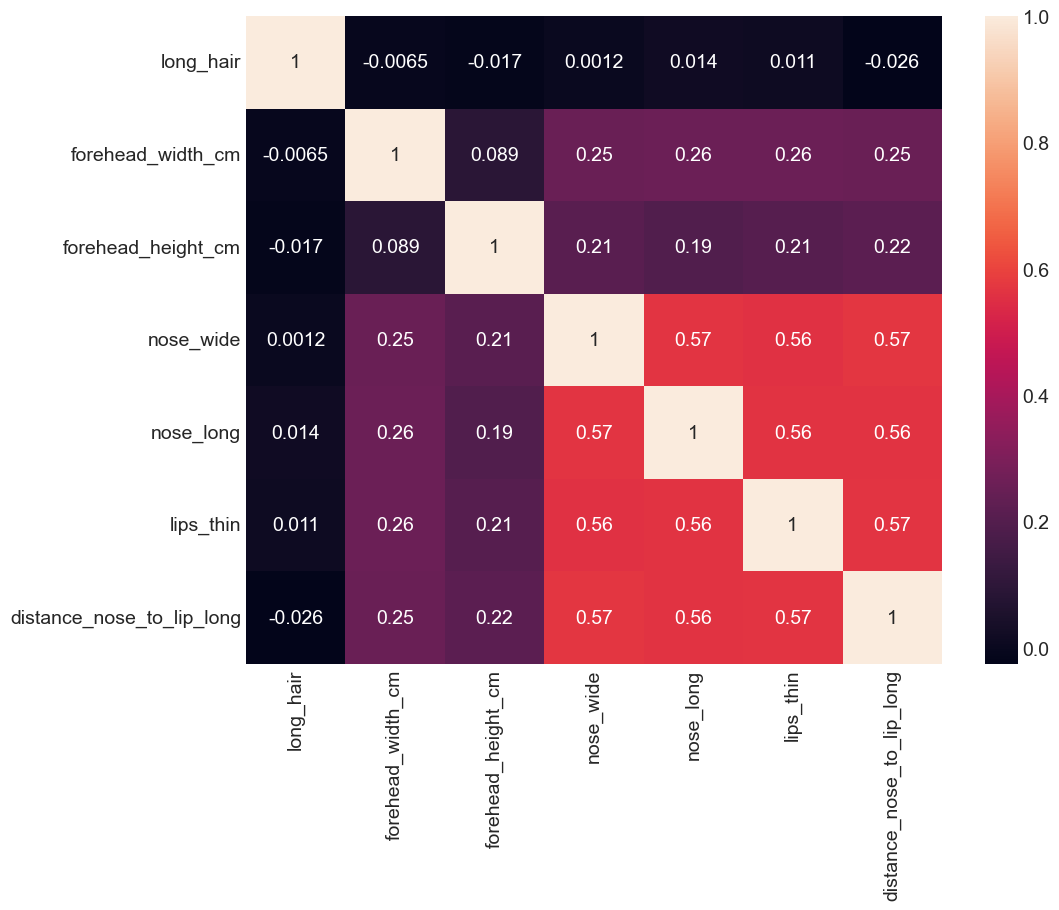

In [63]:
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

Из матрицы корелляций видно, что признаки не слишком кореллируются друг с другом, хотя длина и ширина носа, толщина губ и расстояние от носа до губ имеют корелляцию больше 0.5

## Обучение моделей

In [46]:
accuracies = {}
models = {}

In [47]:
model = LogisticRegression()    
simple_classification(model)
(accuracy, number_of_folds) = classification_using_cross_val(model)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = logistic_regression_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
accuracies['Logistic Regression'] = accuracy
models['Logistic Regression'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.9640
Test accuracy achieved with repeated 3 -Fold Cross-Validation: 0.967
Best C =  0.001
Best penalty =  l2
Test accuracy achieved with repeated 3 -Fold Cross-Validation && tuned hyperparams: 0.967


In [48]:
m = MyLogisticRegression()
simple_classification(m)
(accuracy, number_of_folds) = classification_using_cross_val(MyLogisticRegression())
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = my_logistic_regression_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
accuracies['My Logistic Regression'] = accuracy
models['My Logistic Regression'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.9634
Test accuracy achieved with repeated 4 -Fold Cross-Validation: 0.967
Best C =  1.0
Best regularization =  l2
Test accuracy achieved with repeated 4 -Fold Cross-Validation && tuned hyperparams: 0.967


In [49]:
knn = KNeighborsClassifier()
simple_classification(knn)
(accuracy, number_of_folds) = classification_using_cross_val(knn)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.9f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = knn_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.9f' % (number_of_folds, accuracy))

accuracies['KNN'] = accuracy
models['KNN'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.9627
Test accuracy achieved with repeated 3 -Fold Cross-Validation: 0.966022652
Best n neighbors =  19
Best penalty =  uniform
Best metric =  manhattan
Test accuracy achieved with repeated 8 -Fold Cross-Validation && tuned hyperparams: 0.969353764


In [67]:
myknn = MyKNeighborsClassifier()
simple_classification(myknn)

myknn_accuracies_cv = cross_val_score(myknn, X_train_scaled, y_train, cv=3, scoring='accuracy')
accuracy = np.mean(myknn_accuracies_cv)
print('Test accuracy achieved with 3-Fold Cross-Validation: %.3f' % (accuracy))


# tuning hyperparameters
k = range(1, 21, 2)
# define grid search
grid = dict(k=k)
searcher=GridSearchCV(MyKNeighborsClassifier(), grid, scoring='accuracy', cv=5)
searcher.fit(X_train_scaled,y_train)
# creating model
best_neighbors = searcher.best_params_['k']
print("Best n neighbors = ", best_neighbors)
model = MyKNeighborsClassifier(k=best_neighbors)
myknn_accuracies_cv_thp = cross_val_score(myknn, X_train_scaled, y_train, cv=3, scoring='accuracy')
accuracy_cv_thp = np.mean(myknn_accuracies_cv_thp)
print('Test accuracy achieved with 5-Fold Cross-Validation: %.3f' % (accuracy_cv_thp))

accuracies['MYKNN'] = accuracy_cv_thp
models['MYKNN'] = model

Test Accuracy without repeated k-Fold Cross-Validation 0.9627
Test accuracy achieved with 3-Fold Cross-Validation: 0.967
Best n neighbors =  19
Test accuracy achieved with 5-Fold Cross-Validation: 0.967


In [51]:
svm = SVC(random_state = 12)
simple_classification(svm)
(accuracy, number_of_folds) = classification_using_cross_val(svm)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) =svm_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['SVM'] = accuracy
models['SVM'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.9667
Test accuracy achieved with repeated 7 -Fold Cross-Validation: 0.972
Test accuracy achieved with repeated 11 -Fold Cross-Validation && tuned hyperparams: 0.972


In [52]:
nb = GaussianNB()
simple_classification(nb)
(accuracy, number_of_folds) = classification_using_cross_val(nb)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = nb_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['NB'] = accuracy
models['NB'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.9654
Test accuracy achieved with repeated 4 -Fold Cross-Validation: 0.970
Test accuracy achieved with repeated 7 -Fold Cross-Validation && tuned hyperparams: 0.971


In [53]:
dtc = DecisionTreeClassifier()
simple_classification(dtc)
(accuracy, number_of_folds) = classification_using_cross_val(dtc)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = dtc_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['DTC'] = accuracy
models['DTC'] = best_model

Test Accuracy without repeated k-Fold Cross-Validation 0.9560
Test accuracy achieved with repeated 3 -Fold Cross-Validation: 0.963
Test accuracy achieved with repeated 4 -Fold Cross-Validation && tuned hyperparams: 0.966


## Comparing models

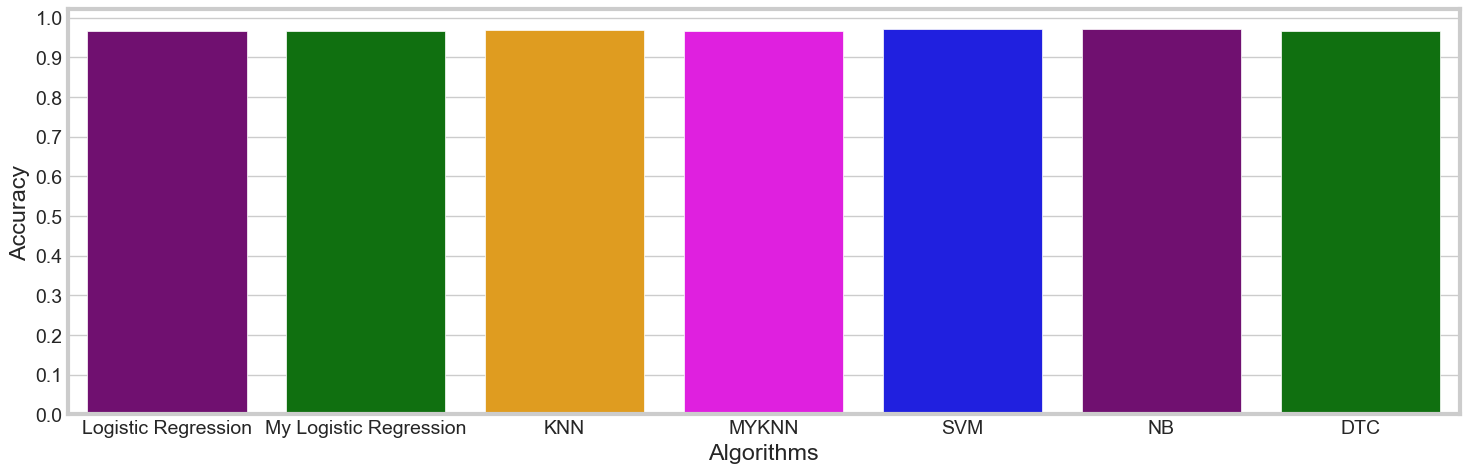

Accuracies: {'Logistic Regression': 0.966688874083944, 'My Logistic Regression': 0.9673550966022652, 'KNN': 0.9693537641572285, 'MYKNN': 0.9665716680801321, 'SVM': 0.972018654230513, 'NB': 0.9706862091938707, 'DTC': 0.966022651565623}


In [68]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()
print('Accuracies:', accuracies)

In [58]:
# Predicted values
lr = models['Logistic Regression']
lr.fit(X_train_scaled, y_train)
y_head_lr = lr.predict(X_test_scaled)

my_lr = models['My Logistic Regression']
my_lr.fit(X_train_scaled, y_train)
y_head_my_lr = my_lr.predict(X_test_scaled)

knn1 = models['KNN']
knn1.fit(X_train_scaled, y_train)
y_head_knn = knn1.predict(X_test_scaled)

my_knn1 = models['MYKNN']
my_knn1.fit(X_train_scaled, y_train)
y_head_my_knn = my_knn1.predict(X_test_scaled)

y_head_svm = models['SVM'].predict(X_test_scaled)

y_head_nb = models['NB'].predict(X_test_scaled)

y_head_dtc = models['DTC'].predict(X_test_scaled)

In [59]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_my_lr = confusion_matrix(y_test, y_head_my_lr)

cm_knn = confusion_matrix(y_test, y_head_knn)
cm_my_knn = confusion_matrix(y_test, y_head_my_knn)

cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

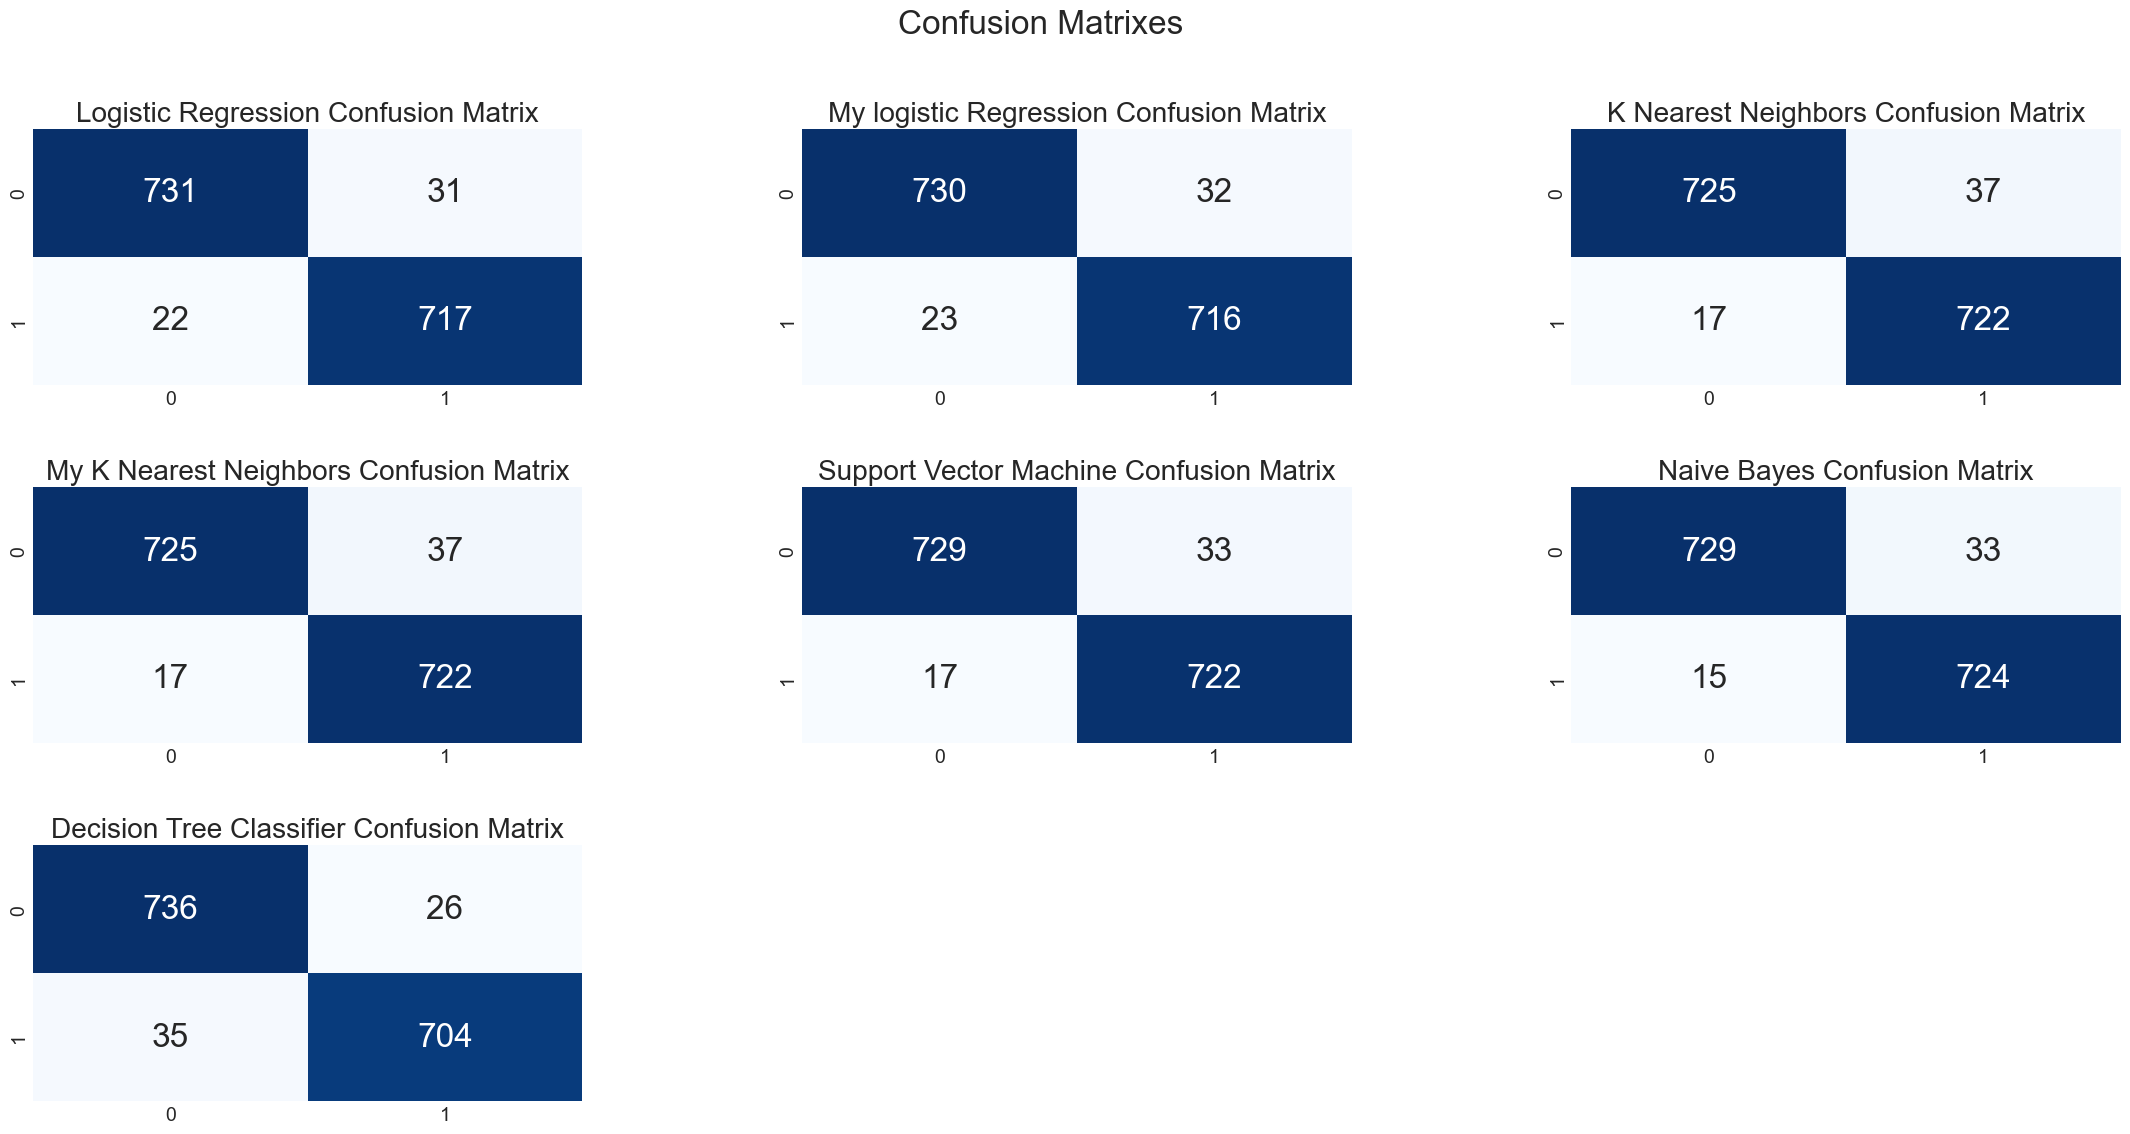

In [60]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("My logistic Regression Confusion Matrix")
sns.heatmap(cm_my_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("My K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_my_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Метод SVM вновь показал наиболее высокую точность. Реализованная логистическая регрессия показала результаты не хуже библиотечной. Реализованный метод KNN показал гораздо более низкую производительность, чем библиотечный KNN, вследствие этого к нему была применена библиотечная кросс-валидация с фиксированным количеством фолдов (на которой был достигнута примерно та же точность, что и библиотечным методом). Предположительно так произошло потому что библиотечный метод пользовался более легковесной метрикой для вычисления ближайших соседей (метрикой манхэттена), в то время как реализация использовала метрику Евклида. Также размер текущего датасета превышает размер предыдущего примерно в 5 раз, что тоже могло оказать существенное влияние на работу метода.